# Proyek Analisis Data: [Air Quality Data Analysis Project]
- **Nama:** Hanadi
- **Email:** Hanadiadi45@gmail.com
- **ID Dicoding:** Hanadi

## Menentukan Pertanyaan Bisnis

- Petanyaan 1 :Bagaimana faktor-faktor lingkungan seperti suhu, kelembapan, kecepatan angin, ozon, dan hujan mempengaruhi kadar polutan utama (PM2.5, PM10, SO₂, NO₂, dan CO) serta kualitas udara secara keseluruhan?
- Pertanyaan 2: Bagaimana kondisi udara pada tiap tiap lokais?
- Petanyaan 3: Apakah ada peningkatan polusi udara pada waktu-waktu tertentu dalam sehari atau dalam tahun.

- Petanyaan 4:  Daerah mana yang menunjukkan kualitas udara paling buruk.?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import requests

## Data Wrangling

### Gathering Data

In [3]:
import pandas as pd

url1 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
df1 = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Changping_20130301-20170228.csv'
df2 = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Dingling_20130301-20170228.csv'
df3 = pd.read_csv(url3)
url4 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Dongsi_20130301-20170228.csv'
df4 = pd.read_csv(url4)
url5 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Guanyuan_20130301-20170228.csv'
df5 = pd.read_csv(url5)
url6 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Gucheng_20130301-20170228.csv'
df6 = pd.read_csv(url6)
url7 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Huairou_20130301-20170228.csv'
df7 = pd.read_csv(url7)
url8 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv'
df8 = pd.read_csv(url8)
url9 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Shunyi_20130301-20170228.csv'
df9 = pd.read_csv(url9)
url10 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Tiantan_20130301-20170228.csv'
df10 = pd.read_csv(url10)
url11 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Wanliu_20130301-20170228.csv'
df11 = pd.read_csv(url11)
url12 = 'https://raw.githubusercontent.com/hanadi-physic-engineer/Air_Quality/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
df12 = pd.read_csv(url12)


In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [5]:
df.to_csv('all_data.csv', index=False)

**Insight:**
- Dataset ini terdiri dari 35.064 entri dengan 18 kolom, sebagian besar dalam tipe data numerik (int64 dan float64).

- Beberapa kolom, seperti **PM2.5**, **PM10**, **SO2**, **NO2**, **CO**, dan **O3**, memiliki nilai yang hilang (null values), yang perlu ditangani sebelum analisis lebih lanjut.

- Kolom **wd** (arah angin) dan **station** (lokasi pengamatan) adalah tipe data objek (kategori) dan bisa berguna untuk segmentasi data berdasarkan lokasi atau kondisi angin.

- Memori yang digunakan cukup besar (4.8 MB), menunjukkan ukuran dataset yang memadai untuk analisis polusi udara dalam jangka waktu yang panjang.

- Nilai yang hilang terutama ditemukan di kolom kualitas udara (seperti PM2.5 dan NO2), yang bisa mengindikasikan kurangnya pengukuran pada waktu tertentu atau masalah teknis saat pengumpulan data.

- Tanggal dan Waktu Pengamatan: Dataset ini mencatat data lingkungan berdasarkan kolom waktu yang terperinci, yaitu year, month, day, dan hour. Ini memungkinkan kita untuk melakukan analisis tren berdasarkan waktu, misalnya melihat perubahan kualitas udara sepanjang hari atau sepanjang tahun.

- Kualitas Udara (PM2.5, PM10, SO2, NO2, CO, O3): Kolom PM2.5 dan PM10 mencatat konsentrasi partikel udara, yang merupakan indikator utama polusi udara.
Kolom SO2, NO2, CO, dan O3 menunjukkan konsentrasi berbagai gas yang juga menjadi bagian dari polusi udara.
Pada beberapa waktu (contoh: 00:00 dan 01:00), konsentrasi PM2.5 dan PM10 cenderung rendah (di bawah 10), tetapi konsentrasi gas-gas polutan seperti SO2 dan NO2 cukup stabil.

- Kondisi Lingkungan (TEMP, PRES, DEWP, RAIN): Kolom TEMP mencatat suhu udara (dalam derajat Celsius) pada waktu tertentu. Dalam contoh data ini, suhu berkisar antara -0.7°C hingga -2.0°C, menunjukkan kondisi yang dingin.
Kolom PRES menunjukkan tekanan udara (dalam hPa), yang bervariasi sedikit di sekitar 1023-1025 hPa.
Kolom DEWP mencatat titik embun, yang di sini berada di angka negatif, menunjukkan kelembapan udara yang rendah.
Kolom RAIN menunjukkan bahwa tidak ada curah hujan yang tercatat (nilai 0.0).

- Arah dan Kecepatan Angin (wd, WSPM): Kolom wd (arah angin) menunjukkan arah angin pada waktu tertentu, misalnya NNW (North-North-West), N (North), dan NW (North-West).
Kolom WSPM mencatat kecepatan angin dalam meter per detik, dengan variasi dari 2.0 hingga 5.6 m/s, yang memberikan informasi tentang intensitas angin.

### Assessing Data

In [6]:
# Menggabungkan kolom-kolom tahun, bulan, hari, dan jam menjadi satu kolom datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

### Missing value

In [7]:
# Menampilkan baris-baris yang memiliki nilai kosong
missing_data = df[df.isnull().any(axis=1)]

# Mengelompokkan data yang memiliki nilai kosong berdasarkan 'station'
missing_by_station = missing_data.groupby('station').size()

# Menampilkan hasil
print(missing_by_station)


station
Aotizhongxin     3249
Changping        2383
Dingling         3758
Dongsi           4726
Guanyuan         2801
Gucheng          2560
Huairou          3356
Nongzhanguan     1950
Shunyi           4870
Tiantan          2221
Wanliu           4430
Wanshouxigong    2296
dtype: int64


### Duplicate data

In [8]:
# Menghitung total sampel dan duplikasi per station
total_count = df.groupby('station').size()  # Total count per station
duplicate_count = df[df.duplicated()].groupby('station').size()  # Duplicate count per station

# Menggabungkan kedua hasil ke dalam DataFrame
result = pd.DataFrame({
    'Total Sample Count': total_count,
    'Duplicate Count': duplicate_count
}).fillna(0)  # Mengganti NaN dengan 0 jika tidak ada duplikasi

# Mengubah kolom 'Duplicate Count' menjadi integer
result['Duplicate Count'] = result['Duplicate Count'].astype(int)

# Menampilkan hasil
print(result)


               Total Sample Count  Duplicate Count
station                                           
Aotizhongxin                35064                0
Changping                   35064                0
Dingling                    35064                0
Dongsi                      35064                0
Guanyuan                    35064                0
Gucheng                     35064                0
Huairou                     35064                0
Nongzhanguan                35064                0
Shunyi                      35064                0
Tiantan                     35064                0
Wanliu                      35064                0
Wanshouxigong               35064                0


**Insight:**
- tidak ada duplikasi pada dataset

### Outlier

In [9]:
# Menghitung Q1 (quartile pertama) dan Q3 (quartile ketiga) untuk kolom 'PM2.5'
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan baris yang merupakan outlier (di luar batas bawah dan atas)
outliers = df[(df['PM2.5'] < lower_bound) | (df['PM2.5'] > upper_bound)]

# Menampilkan baris yang merupakan outlier
outliers


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
120,121,2013,3,6,0,284.0,315.0,133.0,174.0,4000.0,28.0,4.9,1008.5,-6.4,0.0,NE,1.2,Aotizhongxin,2013-03-06 00:00:00
121,122,2013,3,6,1,272.0,300.0,131.0,166.0,4000.0,22.0,4.8,1008.3,-5.9,0.0,NE,1.5,Aotizhongxin,2013-03-06 01:00:00
136,137,2013,3,6,16,248.0,285.0,154.0,146.0,2799.0,17.0,14.2,1005.5,-3.2,0.0,S,1.4,Aotizhongxin,2013-03-06 16:00:00
140,141,2013,3,6,20,254.0,396.0,107.0,154.0,4200.0,17.0,4.4,1008.2,-2.5,0.0,SSW,1.1,Aotizhongxin,2013-03-06 20:00:00
141,142,2013,3,6,21,266.0,380.0,117.0,159.0,3799.0,17.0,3.8,1007.7,-2.2,0.0,WSW,1.9,Aotizhongxin,2013-03-06 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34755,34756,2017,2,16,3,266.0,266.0,46.0,146.0,3200.0,64.0,3.6,1008.8,-6.1,0.0,N,1.3,Wanshouxigong,2017-02-16 03:00:00
34756,34757,2017,2,16,4,264.0,264.0,45.0,140.0,3300.0,64.0,3.7,1008.0,-6.0,0.0,N,1.3,Wanshouxigong,2017-02-16 04:00:00
34757,34758,2017,2,16,5,262.0,262.0,42.0,127.0,3000.0,64.0,2.3,1008.0,-6.1,0.0,ENE,1.4,Wanshouxigong,2017-02-16 05:00:00
34758,34759,2017,2,16,6,261.0,261.0,40.0,132.0,3200.0,64.0,3.1,1008.9,-6.1,0.0,N,1.9,Wanshouxigong,2017-02-16 06:00:00


**Insight:**
- terdapat 19142 baris data yang merupakan outlier

### Cleaning Data

In [10]:
df.fillna(0, inplace=True)

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


## Exploratory Data Analysis (EDA)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     420768 non-null  float64       
 6   PM10      420768 non-null  float64       
 7   SO2       420768 non-null  float64       
 8   NO2       420768 non-null  float64       
 9   CO        420768 non-null  float64       
 10  O3        420768 non-null  float64       
 11  TEMP      420768 non-null  float64       
 12  PRES      420768 non-null  float64       
 13  DEWP      420768 non-null  float64       
 14  RAIN      420768 non-null  float64       
 15  wd        420768 non-null  object        
 16  WSPM      420768 non-null  float64       
 1

In [13]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,78.136185,102.999401,15.491432,49.180449,1170.215042,55.561935,13.526169,1009.802938,2.488436,0.064416,1.728403,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.900000,0.000000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,34.000000,2.000000,21.000000,400.000000,8.000000,3.100000,1002.200000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,53.000000,81.000000,7.000000,42.000000,800.000000,43.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.784157,91.968604,21.539656,35.639163,1162.179098,56.655252,11.438304,32.602211,13.787455,0.820626,1.246821,NaN


In [29]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'datetime', 'Category'],
      dtype='object')

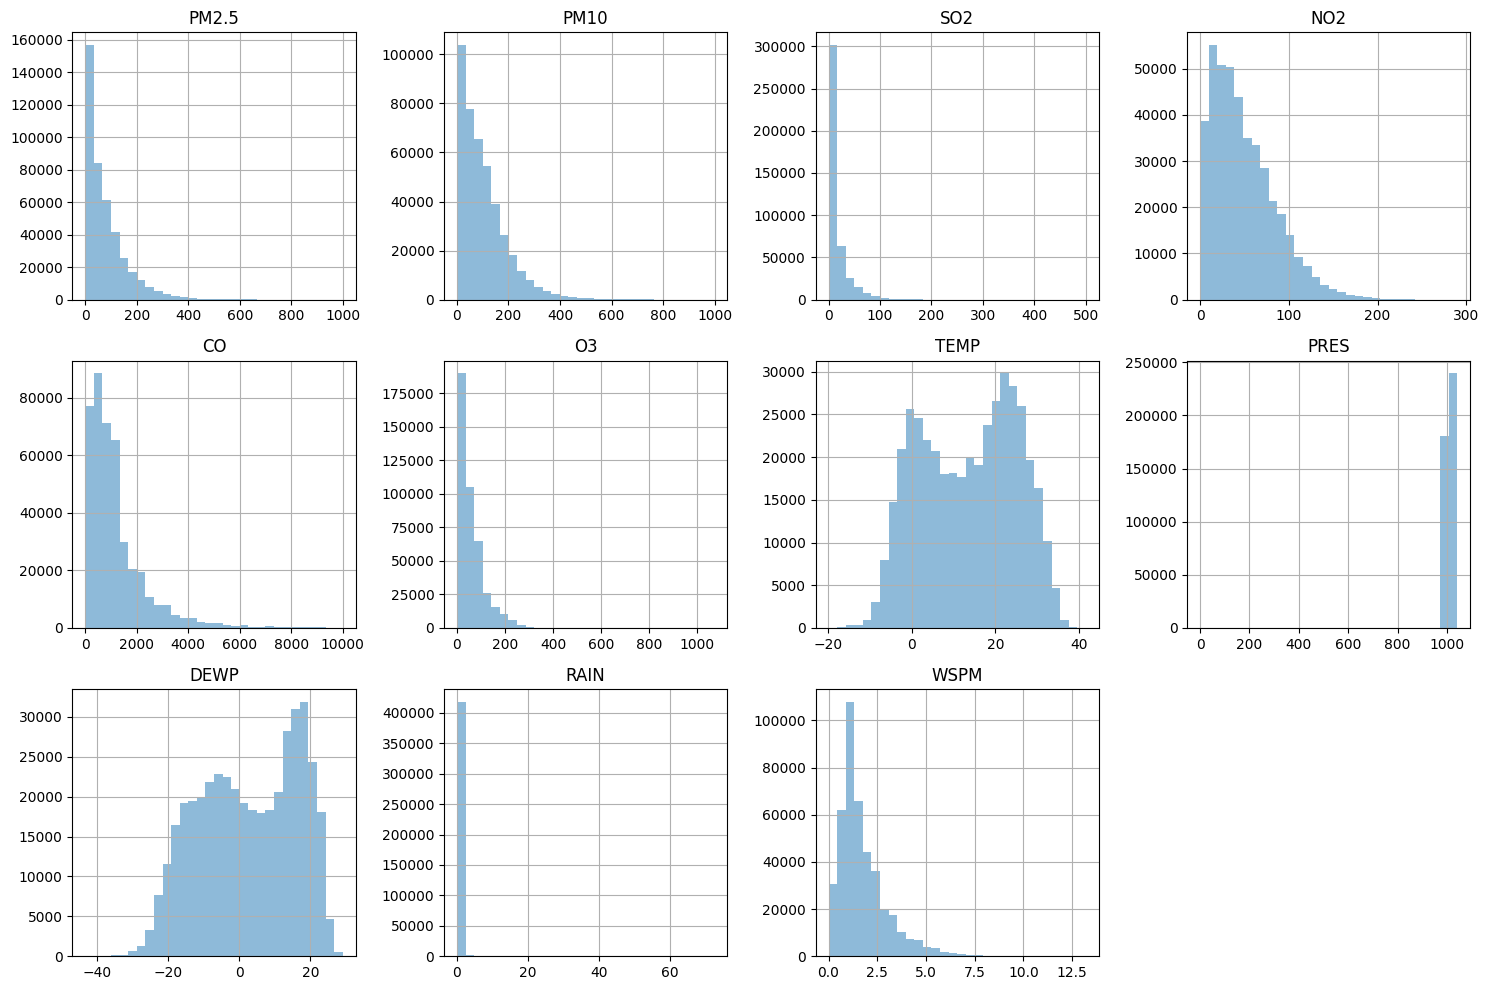

In [32]:
import matplotlib.pyplot as plt

# Kolom yang ingin dianalisis
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

# Membuat histogram untuk kolom yang dipilih berdasarkan 'station'
df[columns_to_plot].hist(bins=30, figsize=(15, 10), alpha=0.5, layout=(3, 4))

plt.tight_layout()  # Mengatur agar tidak tumpang tindih
plt.show()

### Explore ...

In [15]:
import pandas as pd

# Convert object columns to numeric, forcing errors to NaN
cols_to_convert = ['SO2', 'NO2', 'O3', 'TEMP', 'PRES']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the DataFrame info after conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     420768 non-null  float64       
 6   PM10      420768 non-null  float64       
 7   SO2       420768 non-null  float64       
 8   NO2       420768 non-null  float64       
 9   CO        420768 non-null  float64       
 10  O3        420768 non-null  float64       
 11  TEMP      420768 non-null  float64       
 12  PRES      420768 non-null  float64       
 13  DEWP      420768 non-null  float64       
 14  RAIN      420768 non-null  float64       
 15  wd        420768 non-null  object        
 16  WSPM      420768 non-null  float64       
 1

In [16]:
# Define the ranges and AQI (Air Quality Index) upper bounds
category_ranges = [
    'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'
]
pm25_ranges = [12, 35.4, 150.4, 250.4, float('inf')]
pm10_ranges = [54, 154, 254, 354, 424, float('inf')]
so2_ranges = [35, 75, 185, 304, 604, float('inf')]
no2_ranges = [53, 100, 360, 649, 1249, float('inf')]
co_ranges = [4400, 9400, 12400, 15400, 30400, float('inf')]
o3_ranges = [54, 70, 85, 105, 200, float('inf')]

# Define a function to categorize a value based on the given ranges
def categorize(value, ranges):
    for index, max_val in enumerate(ranges):
        if value <= max_val:
            return index
    return len(ranges) - 1  # Return the index of the last range for values above the highest limit

# Create a new column 'Category' by applying the categorize function to each row
df['Category'] = df.apply(
    lambda row: category_ranges[max(
        categorize(row['PM2.5'], pm25_ranges),
        categorize(row['PM10'], pm10_ranges),
        categorize(row['SO2'], so2_ranges),
        categorize(row['NO2'], no2_ranges),
        categorize(row['CO'], co_ranges),
        categorize(row['O3'], o3_ranges),
    )],
    axis=1
)

# Display the updated DataFrame with the new 'Category' column
print(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Category']])


       PM2.5  PM10   SO2   NO2     CO    O3                        Category
0        4.0   4.0   4.0   7.0  300.0  77.0  Unhealthy for Sensitive Groups
1        8.0   8.0   4.0   7.0  300.0  77.0  Unhealthy for Sensitive Groups
2        7.0   7.0   5.0  10.0  300.0  73.0  Unhealthy for Sensitive Groups
3        6.0   6.0  11.0  11.0  300.0  72.0  Unhealthy for Sensitive Groups
4        3.0   3.0  12.0  12.0  300.0  72.0  Unhealthy for Sensitive Groups
...      ...   ...   ...   ...    ...   ...                             ...
35059   11.0  32.0   3.0  24.0  400.0  72.0  Unhealthy for Sensitive Groups
35060   13.0  32.0   3.0  41.0  500.0  50.0                        Moderate
35061   14.0  28.0   4.0  38.0  500.0  54.0                        Moderate
35062   12.0  23.0   4.0  30.0  400.0  59.0                        Moderate
35063   13.0  19.0   4.0  38.0  600.0  49.0                        Moderate

[420768 rows x 7 columns]


## Visualization & Explanatory Analysis

### Pertanyaan 1:

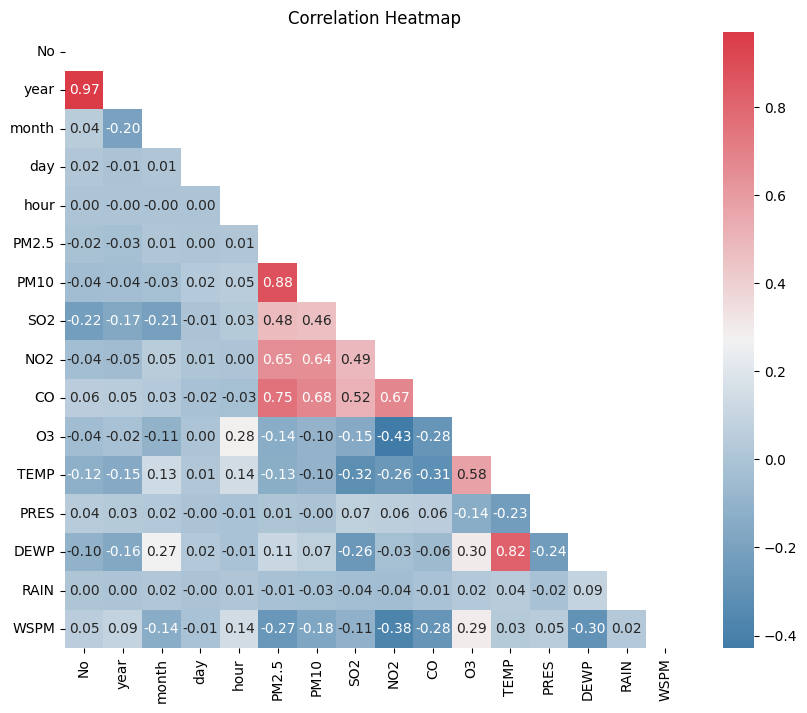

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_df = df.corr(numeric_only=True)

# Create a mask to hide the upper triangular part of the table
mask = np.triu(np.ones_like(correlation_df, dtype=bool))

# Create a custom color map for shading
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create a heatmap with shading
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap=cmap, mask=mask)

plt.title("Correlation Heatmap")
plt.show()


Heatmap menunjukkan korelasi antara variabel kualitas udara dan cuaca sebagai berikut:

- **PM2.5 dan PM10 sangat berkorelasi**, karena keduanya mengukur partikel halus.
- **Tingkat tinggi PM2.5 terkait dengan SO2, NO2, dan CO**, mengindikasikan kualitas udara buruk.
- **Ozon tinggi berkorelasi negatif dengan PM2.5, PM10, SO2, NO2, dan CO**, menunjukkan kemampuannya mengurangi polutan melalui reaksi kimia.
- **Suhu tinggi terkait dengan titik embun tinggi** dan **mungkin berhubungan dengan penurunan tingkat SO2, NO2, CO, dan PM2.5** karena peningkatan dispersi.
- **Kecepatan angin yang lebih tinggi (WSPM) berhubungan dengan penurunan polutan**.
- **Hujan (RAIN) menunjukkan korelasi lemah** dengan variabel lain.



In [18]:
# Create a table of category counts per station
category_counts = pd.crosstab(df['station'], df['Category'])

# Reorder the columns based on the custom order
category_counts = category_counts[category_ranges]
category_counts



Category,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
station,,,,,,
Aotizhongxin,2289,6401,13499,5723,5641,1511
Changping,2694,8036,12898,5217,4972,1247
Dingling,2380,7046,12797,6084,5518,1239
Dongsi,2435,6258,13230,5760,6026,1355
Guanyuan,2349,6548,13463,5596,5639,1469
Gucheng,1678,5985,14015,6078,5734,1574
Huairou,2859,7350,13494,5323,4762,1276
Nongzhanguan,2124,6150,13222,5750,6061,1757
Shunyi,2582,6884,14071,5244,4983,1300


### Pertanyaan 2:

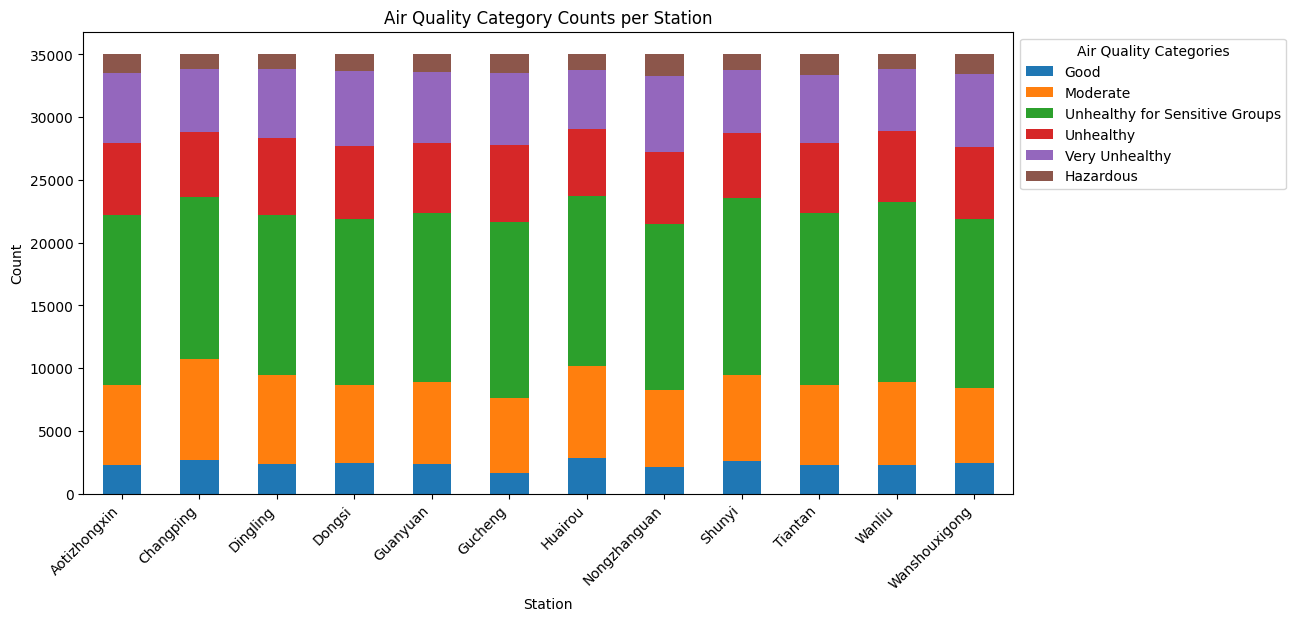

In [19]:
# Create a stacked bar chart
ax = category_counts[category_ranges].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Air Quality Category Counts per Station')
plt.xlabel('Station')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add a legend outside the plot area
plt.legend(title='Air Quality Categories', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

Diagram batang bertumpuk menggambarkan kategori indeks kualitas udara (AQI) di berbagai stasiun pemantauan. Berikut adalah ringkasan wawasan yang diperoleh:

1. **Kualitas Udara Baik:** Changping (2238) dan Shunyi (2044) memiliki jumlah tertinggi di kategori "Baik".
2. **Kualitas Udara Sangat Tidak Sehat:** Shunyi (4983) dan Guanyuan (5639) mencatat jumlah tertinggi di kategori ini.
3. **Kualitas Udara Sedang:** Aotizhongxin dan Dingling, masing-masing di atas 7000, sering mengalami kondisi ini.
4. **Kualitas Udara Tidak Sehat:** Guanyuan, Dongsi, dan Wanliu berisiko tinggi bagi individu dengan kondisi pernapasan.
5. **Keseimbangan Kategori:** Nongzhanguan dan Tiantan menunjukkan variasi yang seimbang di berbagai kategori.
6. **Kualitas Udara Berbahaya:** Gucheng sering mengalami kondisi berbahaya.
7. **Kualitas Udara di Huairou:** Memiliki jumlah rendah di kategori "Sangat Tidak Sehat", menunjukkan kualitas udara yang lebih baik.

Wilayah ini mengalami berbagai kondisi kualitas udara, dengan beberapa kejadian dalam kategori "Berbahaya" dan "Sangat Tidak Sehat", yang penting untuk pemahaman risiko kesehatan dan pengambilan keputusan kebijakan.

### Pertanyaan 3

In [20]:
# Define the air quality parameters
parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

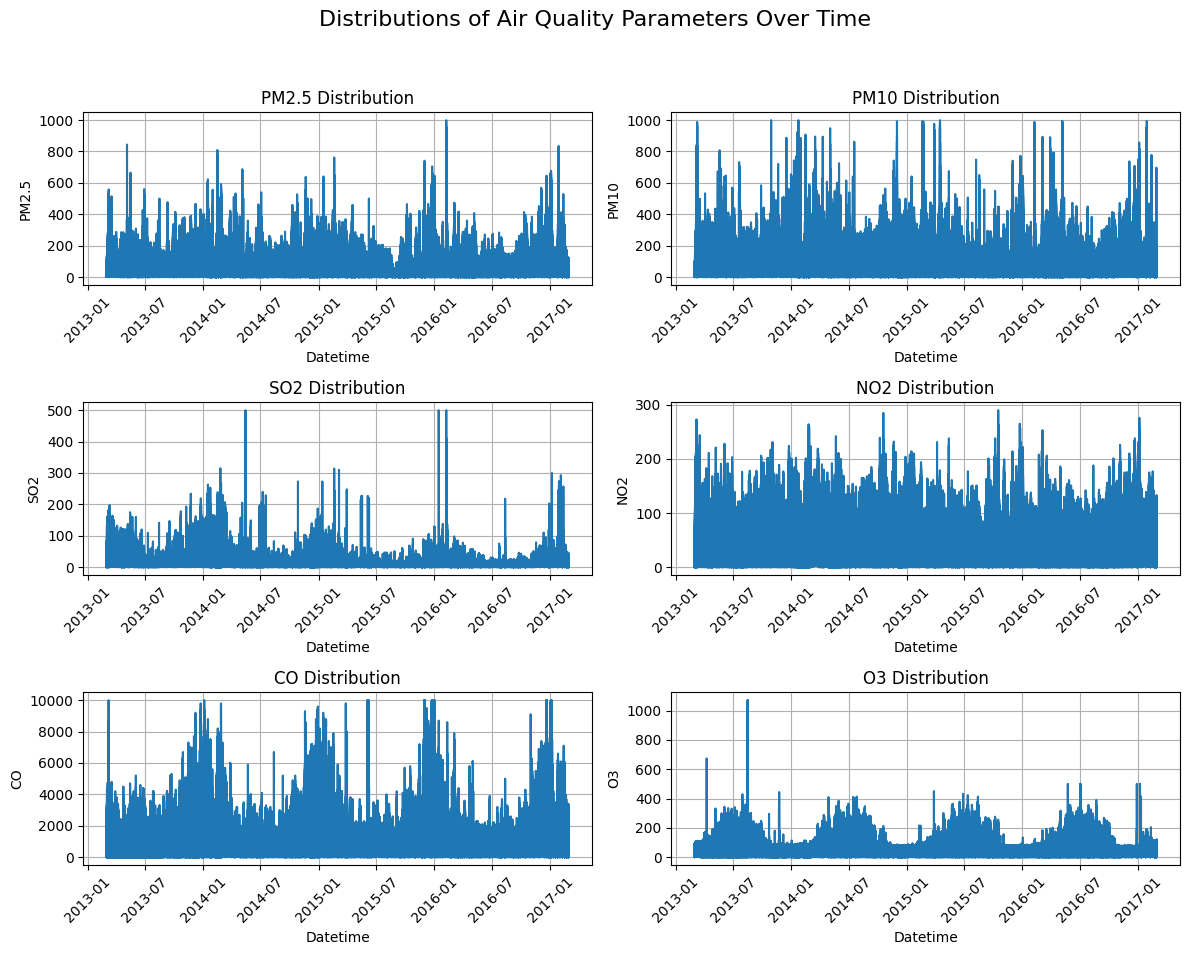

In [22]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Distributions of Air Quality Parameters Over Time', fontsize=16)

# Loop through the parameters and create subplots
for i, parameter in enumerate(parameters):
    row = i // 2  # Row index (0, 0, 1, 1, 2, 2)
    col = i % 2   # Column index (0, 1, 0, 1, 0, 1)

    # Plot the distribution of the parameter
    axes[row, col].plot(df['datetime'], df[parameter], linestyle='-')
    axes[row, col].set_title(f'{parameter} Distribution')
    axes[row, col].set_xlabel('Datetime')
    axes[row, col].set_ylabel(parameter)
    axes[row, col].grid(True)
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the subplots
plt.show()


**Insight** :
- Distribusi kualitas udara pertahun selalu berubah ubah (fluktutaif) tergantung dari lingkungan pada area tersebut

### Pertanyaan 4:

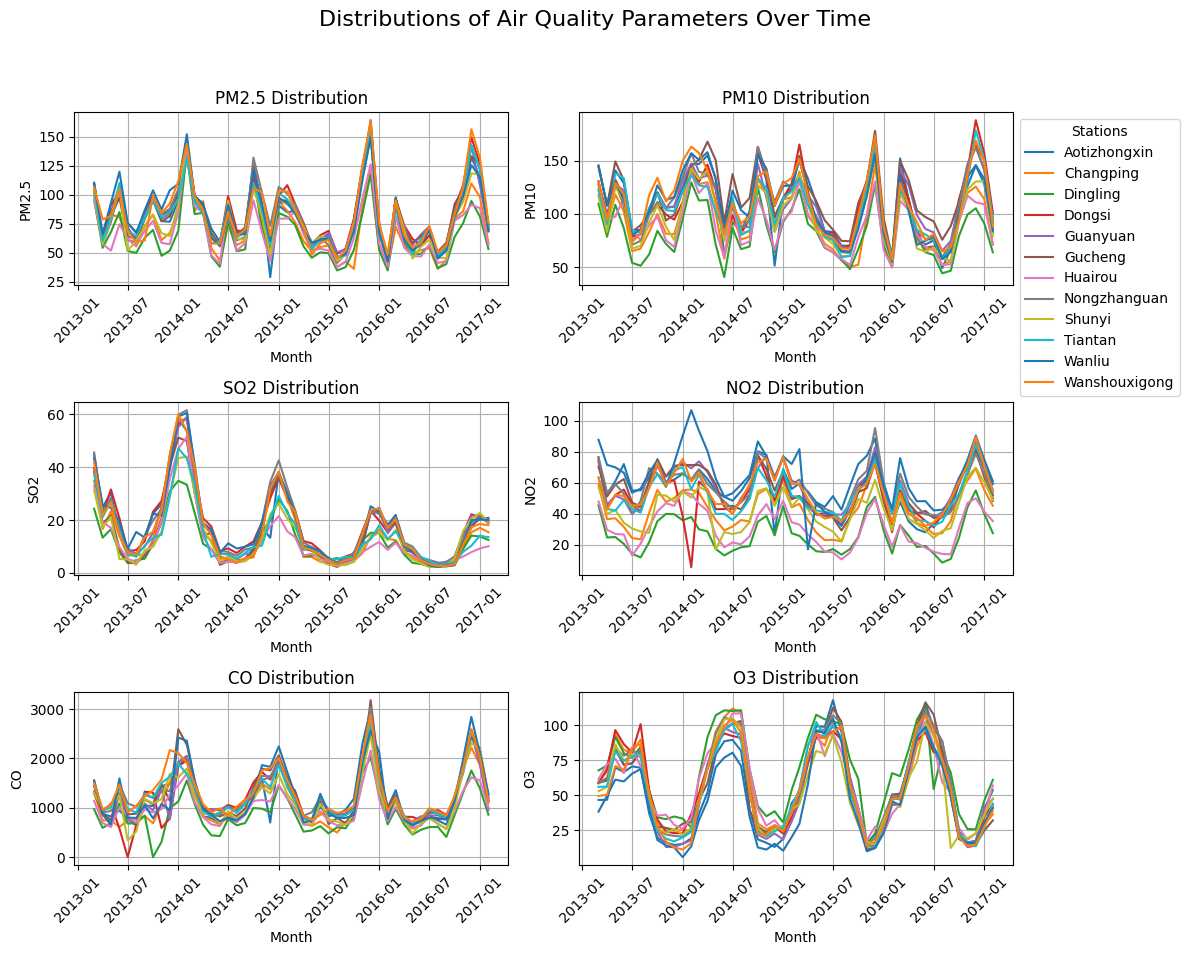

In [23]:
# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Distributions of Air Quality Parameters Over Time', fontsize=16)

# Create an empty list to collect legend handles and labels
legend_handles = []

# Loop through the parameters and create subplots
for i, parameter in enumerate(parameters):
    row = i // 2  # Row index (0, 0, 1, 1, 2, 2)
    col = i % 2   # Column index (0, 1, 0, 1, 0, 1)

    # Group data by month and station, then plot the distribution of the parameter for each station
    grouped_data = df.groupby([df['datetime'].dt.to_period("M"), 'station'])[parameter].mean().unstack()
    monthly_index = grouped_data.index.to_timestamp()  # Convert the index to a datetime series
    for station in grouped_data.columns:
        line, = axes[row, col].plot(monthly_index, grouped_data[station], linestyle='-', label=station)
        if row == 0 and col == 0:
            legend_handles.append(line)

    axes[row, col].set_title(f'{parameter} Distribution')
    axes[row, col].set_xlabel('Month')
    axes[row, col].set_ylabel(parameter)
    axes[row, col].grid(True)
    axes[row, col].tick_params(axis='x', rotation=45)

    # Create a single legend outside of the subplots
    if row == 0 and col == 1:
        axes[row, col].legend(handles=legend_handles, loc='best', bbox_to_anchor=(1, 1), title='Stations')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the subplots
plt.show()


Dari distribusi parameter kualitas udara berdasarkan stasiun, dapat disimpulkan bahwa:

1. Shunyi dan Wanliu memiliki tingkat PM2.5 dan PM10 yang tinggi, menunjukkan kualitas udara buruk.
2. SO2 relatif rendah di semua lokasi, menandakan pencemaran SO2 tidak signifikan.
3. Aotizhongxin, Wanliu, dan Wanshouxigong menunjukkan tingkat NO2 yang tinggi.
4. Tiantan dan Wanshouxigong memiliki tingkat CO yang tinggi.
5. Dingling dan Huairou menunjukkan tingkat O3 yang lebih tinggi.

**KESIMPULAN AKHIR**
- Kualitas udara di wilayah yang dianalisis menunjukkan variasi setiap tahun, dipengaruhi oleh faktor cuaca dan aktivitas manusia, sehingga memerlukan pemantauan dan kebijakan adaptif untuk mengelola dampaknya. Polutan PM2.5 dan PM10 sering muncul bersamaan, dan PM2.5 memiliki korelasi positif dengan SO2, NO2, serta CO, yang mengindikasikan kualitas udara buruk saat konsentrasi mereka meningkat. Sebaliknya, ozon berkorelasi negatif dengan polutan lainnya, menunjukkan perannya dalam mengurangi konsentrasi polutan melalui reaksi kimia di udara. Faktor cuaca seperti suhu tinggi, kelembapan, dan angin tampak membantu menurunkan konsentrasi polutan, sementara hujan memiliki dampak yang lemah tetapi tetap positif terhadap penurunan polusi. Berdasarkan lokasi, area seperti Shunyi, Wanliu, dan Aotizhongxin menunjukkan tingkat polusi yang tinggi, sementara Huairou relatif lebih bersih. Beberapa wilayah, terutama Guanyuan, Dongsi, dan Wanliu, sering mengalami kualitas udara yang "Tidak Sehat" atau bahkan "Berbahaya," yang dapat berdampak pada kesehatan masyarakat. Secara keseluruhan, analisis ini menekankan pentingnya pemantauan terus-menerus dan kebijakan lingkungan yang efektif untuk memperbaiki kualitas udara dan melindungi kesehatan masyarakat.

In [24]:
# 1. Mount Google Drive untuk mengakses file di Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
!pip freeze > /content/drive/MyDrive/Colab/Proyek_Analisis_Data_python/requirements.txt

In [26]:
# Menentukan path ke file README.md di Google Drive
readme_path = '/content/drive/MyDrive/Colab/Proyek_Analisis_Data_python/README.md'

# Menulis konten README.md
with open(readme_path, 'w') as file:
    file.write("# Proyek Analisis Data\n")
    file.write("Proyek ini bertujuan untuk menganalisis data kualitas udara.\n\n")
    file.write("## Dataset\n")
    file.write("Dataset yang digunakan adalah `PRSA_Data_Aotizhongxin_20130301-20170228.csv`, berisi data kualitas udara dari tahun 2013 hingga 2017.\n\n")
    file.write("## Instalasi\n")
    file.write("## Setup Environment - Anaconda\n")
    file.write("```bash\n")
    file.write("conda create --name main-ds python=3.9\n")
    file.write("conda activate main-ds\n")
    file.write("pip install -r requirements.txt\n")
    file.write("```\n\n")
    file.write("## Setup Environment - Shell/Terminal\n")
    file.write("```bash\n")
    file.write("mkdir proyek_analisis_data\n")
    file.write("cd proyek_analisis_data\n")
    file.write("pipenv install\n")
    file.write("pipenv shell\n")
    file.write("pip install -r requirements.txt\n")
    file.write("```\n\n")
    file.write("## Run Streamlit app\n")

print("File README.md berhasil dibuat dan disimpan di Google Drive.")


File README.md berhasil dibuat dan disimpan di Google Drive.
